## COG403: Problem 1 of Problem Set 2: Semantic Representations

### All 3 problems for Problem Set 2 Due 1 November 2018, 2:00pm

In this problem, we will look at three different approaches for generating word vectors. We will then evaluate these word vectors on their ability to match human similarity judgments on a set of noun-noun pairs.  Specifically, we will use a subset of SimLex-999$^1$ that contains animal nouns and has average similarity judgments on pairs of these obtained from human participants.  

### (a)

Write a function `generate_WN_vectors()` to generate feature vectors based on Word Net features$^2$. Generate these vectors and then save them in `data/word_net.vec` using the `write_vectors` function in `provided_functions.py`.

Word net features are in the file `data/all_catf_norm_prob_lexicon_cs.all.txt`. The format is:
    $$<word>:<part\_of\_speech>\textrm{ }<feat1\_name>:<feat1\_val>,<feat2\_name:feat2\_val>,...$$

Note that the feature names may contain spaces, which can be confusing, since the $<word>:<part\_of\_speech>$ is separated from the list of features by a space.

Your approach for generating feature vectors for wordnet features should be a two-step process. First, collect all the features in the file `data/all_catf_norm_prob_lexicon_cs.all.txt` that occur with the words in `data/vocab.txt` (you can load the vocabulary using the `get_vocab` function defined in `provided_functions.py`). Then, generate feature vectors where each field in a vector corresponds to a feature, and the value in the field is the feature value. For example, if you found the features `['animal', 'mammal', 'carnivore']`, your vectors for *cat* and *rat* could be:

* *cat*: `[0.18, 0.07, 0.02]`
* *rat*: `[0.18, 0.07, 0]`

Not all features will be listed for all animals. In these cases, set the field to be 0.0.

Please print your vector for *cat*.

In [34]:
from provided_functions import write_vectors, get_vocab
import numpy as np

def generate_WN_vectors():
    vocab = get_vocab('data/vocab.txt')
    
    feature_dict = {}
    
    word_vector_dict = {}
    
    index_dict = {}
    
    features = list()

    with open('data/all_catf_norm_prob_lexicon_cs.all.txt', 'r') as f:
        lines = f.readlines()

    for i in lines:
        key = i.split(':')[0]
        if key not in feature_dict:
            feature_dict[key] = []
                
        index = i.find(' ')
        feature_list = i[index + 1:].split(',')
        
        for feature in feature_list:
            tmp = feature.split(':')
            
            if len(tmp) > 1: # otherwise it just contains the '\n' character

                if '#' in tmp[0]:
                    tmp[0] = tmp[0][:-2]
                    

                if tmp[0] not in features:
                    features.append(tmp[0])
                    
                feature_dict[key].append((tmp[0], tmp[1]))
                
    for index in range(len(features)):
        index_dict[features[index]] = index
    
    
    for word in vocab:
        if word in feature_dict:
            word_vector_dict[word] = np.zeros(len(features))
            
            for i in feature_dict[word]:
                key = i[0]
                value = i[1]
                index = index_dict[key]
                
                word_vector_dict[word][index] = value
                
                word_vector_dict[word] = np.array(word_vector_dict[word])
        
                
    print(word_vector_dict['cat'])
    
    write_vectors('data/word_net.vec', word_vector_dict)

            

generate_WN_vectors()

[0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.180627 0.130518 0.130518 0.100903 0.09453  0.073416
 0.071086 0.061783 0.051288 0.044947 0.031851 0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0

### (b)

Write a function `generate_SWOW_vectors()` to generate feature vectors based on Small World of Words$^3$ features. Generate these vectors and then save them in `data/small_world_of_words.vec` using the `write_vectors` function in `provided_functions.py`.

The file `data/SWOW-EN.R100.csv` contains cues and responses for a free association task hosted online. In the task, the participant is shown a cue word and asked to respond by listing three response words.  (You can try this out yourself at http://www.smallworldofwords.org!)

You should start by generating a zero-valued square matrix of cues by responses where the cues and responses are the words in `vocab.txt`. Then read through the `data/SWOW-EN.R100.csv` file, and update the row in the matrix corresponding to each cue word, by adding 1 to the count of each response word that appears for that cue. For example, if your vocab (and thus the heading of your matrix columns) was `['cat', 'dog', 'goat', 'fluffy', 'kitten']`, and the first line in the data set had the cue *cat* and the responses [*dog*, *kitten*, *fluffy*], your updated vectors would look like this:
 * *cat*: [0, 1, 0, 1, 1]
 * *dog*: [0, 0, 0, 0, 0]
 * *goat*: [0, 0, 0, 0, 0]
 * *fluffy*: [0, 0, 0, 0, 0]
 * *kitten*: [0, 0, 0, 0, 0] 
 
After generating your cue-to-response vectors, set the diagonal entries of the matrix to be the highest value of each row; that is, the entry for the cue itself in the response vector of the cue should be set to the highest response count for that cue. This is done to make the vectors more appropriate for assessing similarity. We want the word *cat* to be the most similar to itself.

For example, if we have the following vector for *cat* (assuming the same feature order as in the example above):
 * *cat*: [0, 30, 1, 20, 15],
 
we would set the response count for *cat* to the max response count, 30, to get the following:
 * *cat*: [30, 30, 1, 20, 15]


Please print your SWOW vector for *cat* as well as the value associated with *cat* in the cat vector. Make sure to label these two things clearly.

In [35]:
import pandas as pd
from provided_functions import write_vectors

#NOTICE: The 'data/SWOW-EN.R100.csv' has a faulty entry in the very end. I the following to make it a readable csv file:
# '"262476",320456,28662,40,"Ma","German","Unite'

def generate_SNOW_vectors():
    df = pd.read_csv('data/SWOW-EN.R100.csv', index_col=0)
      
    with open('data/vocab.txt', 'r') as f:
        lines = f.readlines()
    
    entries = []
    responses = ['R1', 'R2', 'R3']
    
    for line in lines:
        entries.append(line.strip('\n'))
    
    vocab_matrix = np.zeros((len(entries), len(entries)))
    
    df = df.drop(['id', 'participantID', 'age', 'gender', 'nativeLanguage', 'country', 'education', 'created_at'], axis=1)
    
    for i in df.index:
        cue = df['cue'].loc[i]
        
        if cue in entries:
            cue_index = entries.index(cue)
            
            response_list = []
            
            for response in responses:
                tmp = df[response].loc[i]

                if tmp in entries:
                    response_index = entries.index(tmp)
                    
                    vocab_matrix[cue_index, response_index] += 1

                    
    for i in range(len(vocab_matrix)):
        max_ = max(vocab_matrix[i])
        vocab_matrix[i,i] = max_

    word_vector_dict = {}
    
    for index in range(len(entries)):
        word_vector_dict[entries[index]] = vocab_matrix[index]    
        
    cat_index = entries.index('cat')
    
    print(vocab_matrix[cat_index])
    print('-------------------------------------')
    print('\n Making it easier to understand:\n')
    cat_dict = {}
    
    for ind in range(len(entries)):
        cat_dict[entries[ind]] = vocab_matrix[cat_index][ind]
    
    print(cat_dict)
    
    write_vectors('data/small_world_of_words.vec', word_vector_dict)
    return word_vector_dict

word_vector_dict = generate_SNOW_vectors()




[ 0.  0.  4.  0.  0. 10. 61.  6.  0.  0.  1.  0. 12.  0.  0.  0.  0.  0.
  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. 61.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
-------------------------------------

 Making it easier to understand:

{'fox': 0.0, 'beef': 0.0, 'lion': 4.0, 'dinner': 0.0, 'boy': 0.0, 'fur': 10.0, 'dog': 61.0, 'pet': 6.0, 'rice': 0.0, 'cattle': 0.0, 'sheep': 1.0, 'chicken': 0.0, 'mouse': 12.0, 'colt': 0.0, 'bull': 0.0, 'hawk': 0.0, 'hound': 0.0, 'bee': 0.0, 'goat': 1.0, 'oil': 0.0, 'ox': 0.0, 'bird': 1.0, 'rabbit': 1.0, 'cow': 0.0, 'hen': 0.0, 'container': 0.0, 'management': 0.0, 'rat': 0.0, 'lamb': 0.0, 'horse': 0.0, 'queen': 0.0, 'deck': 0.0, 'turkey': 0.0, 'mare': 0.0, 'kid': 0.0, 'daughter': 0.0, 'ant': 0.0, 'steak': 0.0, 'calf': 0.0, 'insect': 0.0, 'cat': 61.0, 'mink': 0.0, 'fence': 0.0, 'god': 0.0, 'sunshine': 0.0, 'ray': 0.0, 'devil': 0.0, 'honey': 0.0, 'sugar': 0.0, 'rail': 0.0}


### (c)

Write a function `evaluate_vectors` that takes a set of vectors and evaluates them using SimLex-999. Write your function according to the description below.

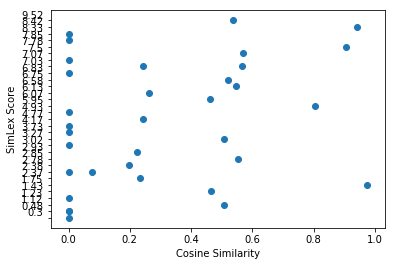

Pearson r is: 0.30020703341442356, with p value: 0.08451655032349062



In [36]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity

SIM_LEX_FILE = 'data/SimLex-999-Animals.txt'

def evaluate_vectors(word_vector_dict):
    """
    word_vector_dict: dict of str to list -- a dictionary mapping words to vectors.
    
    1. Iterate over the word pairs in the SimLex-999 Animal subset at `data/SimLex-999-Animals.txt`.
       Compute the similarities between your word vectors for the word pairs using cosine similarity
       (use `sklearn.metrics.pairwise.cosine_similarity`). Skip word pairs where one or both of the
       vectors are missing from word_vector_dict.
    2. Print the pearson correlation r, and the corresponding p value, between the SimLex-999
       similarity scores and the cosine similarities for word pairs. (Use `scipy.stats.pearsonr`).
       Please print "Pearson r is: ", and "with p value: ".
    3. Use `matplotlib` to generate a plot of SimLex-999 similarity scores and cosine similarities
       for word pairs.
    """
    # TODO
    
    SimLex_score = []
    cosine_score = []
    
    with open(SIM_LEX_FILE, 'r') as f:
        lines = f.readlines()
        
    for line in lines:
        line = line.split('\t')
        word_1 = line[0]
        word_2 = line[1]
        score = line[2]
        
        if word_1 in word_vector_dict and word_2 in word_vector_dict: 
            s = cosine_similarity([word_vector_dict[word_1]], [word_vector_dict[word_2]])
            cosine_score.append(s[0][0])
            SimLex_score.append(score)

    plt.scatter(cosine_score, SimLex_score)
    plt.ylabel('SimLex Score')
    plt.xlabel('Cosine Similarity')

    plt.show()
    
    SimLex_score = np.array(SimLex_score).astype(np.float)
    
    r = pearsonr(cosine_score, SimLex_score)[0]
    p = pearsonr(cosine_score, SimLex_score)[1]
    
    print('Pearson r is: {0}, with p value: {1}'.format(r, p))
    
evaluate_vectors(word_vector_dict)

### (d)

Run `evaluate_vectors` from part c on the WordNet vectors generated in part a. Use `load_vectors` defined in `provided_functions.py` to load the vectors.

6803
dog cat
0.3136827507447263
1.75

---------
6803
cow cattle
0.9999527232662179
9.52

---------
6803
sheep lamb
0.7524808993577243
8.42

---------
6803
mouse cat
0.9965592040710518
1.12

---------
6803
boy kid
0.6383806499295545
7.5

---------
6803
rat mouse
0.9999807859105971
7.78

---------
6803
cat lion
0.9999712748700257
6.75

---------
6803
cat pet
0.4068590450690336
5.95

---------
6803
bird turkey
0.993372500535915
6.58

---------
6803
insect bee
0.9952400333273603
6.07

---------
6803
sheep cattle
0.9998298105251613
4.77

---------
6803
cow goat
0.9997447506850909
2.93

---------
6803
bee queen
0.9998252792847752
3.27

---------
6803
cattle beef
0.39837172895059436
7.03

---------
6803
bee ant
0.999968235322501
2.78

---------
6803
chicken rice
0.7089852324417594
1.43

---------
6803
cat rabbit
0.9970575637050374
2.37

---------
6803
bird hen
0.9932053307601221
7.03

---------
6803
daughter kid
0.6363913895127415
4.17

---------
6803
chicken steak
0.998277785593314
3.73

---

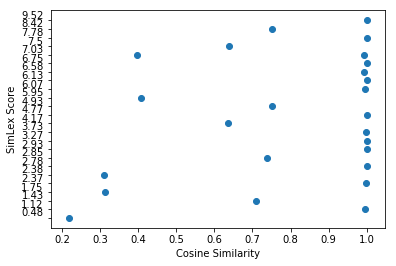

[1.75 9.52 8.42 1.12 7.5  7.78 6.75 5.95 6.58 6.07 4.77 2.93 3.27 7.03
 2.78 1.43 2.37 7.03 4.17 3.73 6.13 4.93 2.38 2.85 0.48]
(0.2718707466393108, 0.18861558125165737)


In [30]:
from provided_functions import load_vectors
np.set_printoptions(threshold=np.nan)

vector_dict = load_vectors('data/word_net.vec')
evaluate_vectors(vector_dict)

### (e)

Run `evaluate_vectors` from part c on the Small World of Words vectors generated in part b. Use `load_vectors` defined in `provided_vectors.py` to load the vectors.

['0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '1.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '9.0'
 '1.0' '0.0' '0.0' '0.0' '0.0' '9.0' '0.0' '0.0' '0.0' '4.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '1.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0\n']
['0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0\n']
horse mare
0.0
8.33

---------
['0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '1.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '9.0'
 '1.0' '0.0' '0.0' '0.0' '0.0' '9.0' '0.0' '0.0' '0.0' '4.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '1.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0\n']
['0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0

['0.0' '0.0' '0.0' '0.0' '0.0' '3.0' '0.0' '1.0' '0.0' '0.0' '0.0' '0.0'
 '12.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '11.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '12.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0\n']
deck mouse
0.0
0.48

---------
['0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '1.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '1.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0\n']
['0.0' '0.0' '0.0' '0.0' '0.0' '3.0' '0.0' '1.0' '0.0' '0.0' '0.0' '0.0'
 '12.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '11.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '12.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0\n']
container mouse
0.0
0.3

---------


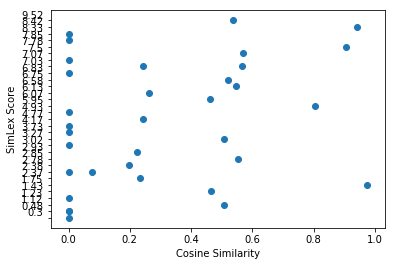

[8.33 7.07 7.85 1.75 9.52 8.42 1.12 2.38 7.5  7.78 6.75 5.95 6.83 6.58
 6.07 4.77 2.93 3.27 7.03 2.78 1.43 2.37 1.23 7.03 4.17 3.73 3.02 6.13
 4.93 2.38 2.85 0.48 0.48 0.3 ]
(0.30020703341442356, 0.08451655032349062)


In [33]:
from provided_functions import load_vectors

vector_dict = load_vectors('data/small_world_of_words.vec')
evaluate_vectors(vector_dict)

### (f)

Run `evaluate_vectors` from part c on word2vec vectors stored in `data/word2vec.vec`. Use `load_vectors` defined in `provided_functions.py` to load the vectors.

These vectors are a subset of vectors from a 2017 paper by Fares$^4$ with:
 * dimension: 300
 * window: 5
 * corpus: Gigaword 5th Edition
 * vocab size: 261794
 * algorithm: Gensim Continuous Skipgram
 * lemmatization: True

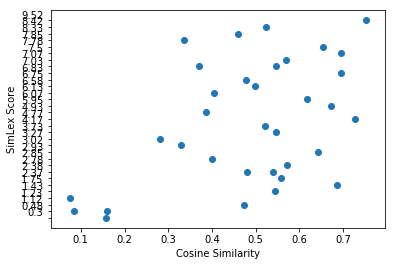

[8.33 7.07 7.85 1.75 9.52 8.42 1.12 2.38 7.5  7.78 6.75 5.95 6.83 6.58
 6.07 4.77 2.93 3.27 7.03 2.78 1.43 2.37 1.23 7.03 4.17 3.73 3.02 6.13
 4.93 2.38 2.85 0.48 0.48 0.3 ]
(0.4893719058835221, 0.003311038271526706)


In [17]:
from provided_functions import load_vectors

vector_dict = load_vectors('data/word2vec.vec')
evaluate_vectors(vector_dict)

### (g)

 * 1. Which set of vectors performs best? Justify your answer referring to both the results of your Pearson correlations and the scatterplots.

 * 2. For each of the two features spaces that don't perform as well, examine some example similarity comparisons and the corresponding word vectors. From your inspection, what do you think are the shortcomings of these vector spaces in this task? Show example noun-noun pairs that support your hypothesis about why each of the two vector spaces is not performing well.  Explain how these examples support your hypotheses.

The word2vec vectors perform by far the best with an r value of 0.489 and a p value of 0.003. The p value is indicative of how strong the evidence is against the null hypothesis (i.e no linear correlation), while the r value is the strength and type of the linear correlation. The small_world_of_words system had an r value of 0.272 and p value of 0.189 and the word_net systems had an r value of 0.300, and a p value of 0.0845. With every system we noticed a weak positive correlation with fairly small p values.

For both the word_net and small_world_of_words system, we are working with a fairly small data set where by the law of large numbers, the estimated values are 'far' away from the true parameters. This is very easy to identify in the two plots above, in the word_net vector, we have a large number of noun-noun pairs with a cosine similarity of 1 over a large range of different SimLex scores. For example the pair 'chicken' and 'steak' have a cosine similarity of 0.998 while only a SimLex score of 3.73 (which seems a lot more plausible). If we look at the matrix associated with 'chicken' and 'steak', we notice that it is extremly large (6803 x 6803) and that most of the entries are just 0. Meaning the majority of the correlation between the two words is based on what features are not associated with the word. For example 'dog' and 'crystal' have semantically almost nothing in common, but they have a lot in common in terms of what does not characterize them. Just because the features 'banker', 'salmon' and 'beer' is not associated with both of them, does not mean that in conclusion 'dog' and 'crystal' must be similar. 

The small_world_of_words we get a lot of $\sim 0$ cosine similarity. This is not suprising at all, we are misapplying cosine similarity. Looking at its formula:

$$\text{Cosine similarity } = \frac{A \cdot B}{||A|| ||B||}$$
if either the vector $A$ or $B$ is the zero-vector, then cosine similarity becomes undefined. Rather than raising the error, sklearn sets the cosine similarity to $0$. This is exactly what happens with the noun-noun pair'horse' and 'mare', 'mare' is associated with a zero-vector.

### Citations

$^1$Hill, F., Reichart, R., & Korhonen, A. (2015). SimLex-999: Evaluating Semantic Models With (Genuine) Similarity Estimation. Computational Linguistics, 41(4), 665-695. doi:10.1162/coli_a_00237

$^2$Miller, G. A., Beckwith, R., Fellbaum, C., Gross, D., & Miller, K. J. (1990). Introduction to WordNet: An On-line Lexical Database*. International Journal of Lexicography, 3(4), 235-244. doi:10.1093/ijl/3.4.235

$^3$Data is from http://www.smallworldofwords.org.

$^4$ Fares, Murhaf; Kutuzov, Andrei; Oepen, Stephan & Velldal, Erik (2017). Word vectors, reuse, and replicability: Towards a community repository of large-text resources, In Jörg Tiedemann (ed.), Proceedings of the 21st Nordic Conference on Computational Linguistics, NoDaLiDa, 22-24 May 2017. Linköping University Electronic Press. ISBN 978-91-7685-601-7